# Calculate the Balance Index, Highest BI Recipe and Personalized Recipe

In [4]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import operator

import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import normalize

In [ ]:
#standard % daily value for normal people with 2000 kcal
dailyvals_2000 = {'Total Fat': 65, 'Saturated Fat': 20, 'Cholesterol': 300, 'Sodium': 2400, 'Potassium': 3500,
             'Total Carbohydrates': 300, 'Dietary Fiber': 25, 'Protein': 100, 'Sugars': 31.5,'Vitamin A': 8000,
             'Vitamin C': 60, 'Calcium': 1300, 'Iron': 27, 'Thiamin': 1.7, 'Niacin': 20, 'Vitamin B6': 2.5, 'Folate': 800,
            'Magnesium': 400, 'Energy': 2300}

In [308]:
#standard % daily value for each nutrient for pragnant woman with 2300 kcal
#https://www.fda.gov/Food/GuidanceRegulation/GuidanceDocumentsRegulatoryInformation/DietarySupplements/ucm070620.htm

dailyvals_2300 = {'Total Fat': 65, 'Saturated Fat': 20, 'Cholesterol': 300, 'Sodium': 2400, 'Potassium': 3500,
             'Total Carbohydrates': 300, 'Dietary Fiber': 25, 'Protein': 100, 'Sugars': 31.5,'Vitamin A': 8000,
             'Vitamin C': 60, 'Calcium': 1300, 'Iron': 27, 'Thiamin': 1.7, 'Niacin': 20, 'Vitamin B6': 2.5, 'Folate': 800,
            'Magnesium': 400, 'Energy': 2300}

In [309]:
db = pd.read_csv('recipe_final.csv', encoding = "ISO-8859-1")
db.head()

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories,Health Score,ratings,class_prob
0,1 dish chicken parmesan,4,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,0.536,...,0.166667,0.0,0.85,0.5,0.1200,0.1775,412,-2.303607,4.093571,0.817866
1,1 dish pepperoni cheese pizza bake,4,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,0.306,...,0.111111,0.0,0.30,0.0,0.0475,0.1775,329,-3.592734,4.548874,0.811078
2,1 pea salad most requested,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,0.176,...,0.111111,0.0,0.15,0.0,0.1825,0.1400,333,-1.992816,4.149361,0.987261
3,15 minute herbed chicken,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,0.534,...,0.055556,0.0,0.80,0.0,0.0650,0.0125,225,0.738758,4.338405,0.947147
4,2 step creamy chicken and pasta,7,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,0.578,...,0.055556,0.0,0.55,0.0,0.0475,0.0050,340,-0.303774,4.113393,0.756919


# 1. BNI calculation for individual recipes

In [310]:


# conver the nutrient to per serving
#  Macro Nutrients
db['Total Carbohydrates'] = db['Total Carbohydrates'] * dailyvals['Total Carbohydrates'] 
db['Protein'] = db['Protein'] * dailyvals['Protein'] 
# good nutrient
db['Vitamin A'] = db['Vitamin A'] * dailyvals['Vitamin A'] 
db['Vitamin C'] = db['Vitamin C'] * dailyvals['Vitamin C'] 
db['Calcium'] = db['Calcium'] * dailyvals['Calcium'] 
db['Iron'] = db['Iron'] * dailyvals['Iron'] 
db['Thiamin'] = db['Thiamin'] * dailyvals['Thiamin'] 
db['Niacin'] = db['Niacin'] * dailyvals['Niacin'] 
db['Vitamin B6'] = db['Vitamin B6'] * dailyvals['Vitamin B6'] 
db['Magnesium'] = db['Magnesium'] * dailyvals['Magnesium'] 
db['Folate'] = db['Folate'] * dailyvals['Folate'] 
db['Potassium'] = db['Potassium'] * dailyvals['Potassium'] 
db['Dietary Fiber'] = db['Dietary Fiber'] * dailyvals['Dietary Fiber'] 
# moderate nutrient
db['Total Fat'] = db['Total Fat'] * dailyvals['Total Fat'] 
db['Saturated Fat'] = db['Saturated Fat'] * dailyvals['Saturated Fat'] 
db['Cholesterol'] = db['Cholesterol'] * dailyvals['Cholesterol'] 
db['Sodium'] = db['Sodium'] * dailyvals['Sodium'] 
db['Sugars'] = db['Sugars'] * dailyvals['Sugars'] 


# standardized to 20000 Kcal intake
db['Carb_std'] = db['Total Carbohydrates'] / db['Calories'] * dailyvals['Energy']
db['Protein_std'] = db['Protein'] / db['Calories'] * dailyvals['Energy']
db['VitA_std'] = db['Vitamin A'] / db['Calories'] * dailyvals['Energy']
db['VitC_std'] = db['Vitamin C'] / db['Calories'] * dailyvals['Energy']
db['Calcium_std'] = db['Calcium'] / db['Calories'] * dailyvals['Energy']
db['Iron_std'] = db['Iron'] / db['Calories'] * dailyvals['Energy']
db['Thiamin_std'] = db['Thiamin'] / db['Calories'] * dailyvals['Energy']
db['Niacin_std'] = db['Niacin'] / db['Calories'] * dailyvals['Energy']
db['VitB6_std'] = db['Vitamin B6'] / db['Calories'] * dailyvals['Energy']
db['Magnesium_std'] = db['Magnesium'] / db['Calories'] * dailyvals['Energy']
db['Folate_std'] = db['Folate'] / db['Calories'] * dailyvals['Energy']
db['Potassium_std'] = db['Potassium'] / db['Calories'] * dailyvals['Energy']
db['Dietary Fiber_std'] = db['Dietary Fiber'] / db['Calories'] * dailyvals['Energy']
# moderate nutrient
db['Total Fat_std'] = db['Total Fat'] / db['Calories'] * dailyvals['Energy']
db['Saturated Fat_std'] = db['Saturated Fat'] / db['Calories'] * dailyvals['Energy']
db['Cholesterol_std'] = db['Cholesterol'] / db['Calories'] * dailyvals['Energy']
db['Sodium_std'] = db['Sodium'] / db['Calories'] * dailyvals['Energy']
db['Sugars_std'] = db['Sugars'] / db['Calories'] * dailyvals['Energy']

    

# calculate the BNI
db['Carb_BNI'] = [x / dailyvals['Total Carbohydrates'] * 5 if x < dailyvals['Total Carbohydrates'] else 10 for x in db['Carb_std']]
db['Protein_BNI'] = [x / dailyvals['Protein'] * 15 if x < dailyvals['Protein'] else 10 for x in db['Protein_std']]
db['VitA_BNI'] = [x / dailyvals['Vitamin A'] * 5 if x < dailyvals['Vitamin A'] else 5 for x in db['VitA_std']]
db['VitC_BNI'] = [x / dailyvals['Vitamin C'] * 5 if x < dailyvals['Vitamin C'] else 5 for x in db['VitC_std']]
db['Calcium_BNI'] = [x / dailyvals['Calcium'] * 5 if x < dailyvals['Calcium'] else 5 for x in db['Calcium_std']]
db['Iron_BNI'] = [x / dailyvals['Iron'] * 5 if x < dailyvals['Iron'] else 5 for x in db['Iron_std']]
db['Thiamin_BNI'] = [x / dailyvals['Thiamin'] * 5 if x < dailyvals['Thiamin'] else 5 for x in db['Thiamin_std']]
db['Niacin_BNI'] = [x / dailyvals['Niacin'] * 5 if x < dailyvals['Niacin'] else 5 for x in db['Niacin_std']]
db['VitB6_BNI'] = [x / dailyvals['Vitamin B6'] * 5 if x < dailyvals['Vitamin B6'] else 5 for x in db['VitB6_std']]
db['Magnesium_BNI'] = [x / dailyvals['Magnesium'] * 5 if x < dailyvals['Magnesium'] else 5 for x in db['Magnesium_std']]
db['Folate_BNI'] = [x / dailyvals['Folate'] * 5 if x < dailyvals['Folate'] else 5 for x in db['Folate_std']]
db['Potassium_BNI'] = [x / dailyvals['Potassium'] * 5 if x < dailyvals['Potassium'] else 5 for x in db['Potassium_std']]
db['Dietary Fiber_BNI'] = [x / dailyvals['Dietary Fiber'] * 5 if x < dailyvals['Dietary Fiber'] else 5 for x in db['Dietary Fiber_std']]
# nutrient of moderate intake
db['Total Fat_BNI'] = [(dailyvals['Total Fat'] - x) / dailyvals['Total Fat'] * 5 if x < dailyvals['Total Fat'] else 0 for x in db['Total Fat_std'] ]
db['Saturated Fat_BNI'] = [(dailyvals['Saturated Fat'] - x) / dailyvals['Saturated Fat'] * 5 if x < dailyvals['Saturated Fat'] else 0 for x in db['Saturated Fat_std'] ]
db['Cholesterol_BNI'] = [(dailyvals['Cholesterol'] - x) / dailyvals['Cholesterol'] * 5 if x < dailyvals['Cholesterol'] else 0 for x in db['Cholesterol_std'] ]
db['Sodium_BNI'] = [(dailyvals['Sodium'] - x) / dailyvals['Sodium'] * 5 if x < dailyvals['Sodium'] else 0 for x in db['Sodium_std'] ]
db['Sugars_BNI'] = [(dailyvals['Sugars'] - x) / dailyvals['Sugars'] * 5 if x < dailyvals['Sugars'] else 0 for x in db['Sugars_std'] ]


# total BNI
db['BNI'] = db['Carb_BNI'] + db['Protein_BNI'] + db['VitA_BNI'] + db['VitC_BNI'] + db['Calcium_BNI'] + db['Iron_BNI'] + \
            db['Thiamin_BNI'] + db['Niacin_BNI'] + db['VitB6_BNI'] + db['Magnesium_BNI'] + db['Folate_BNI'] + db['Potassium_BNI'] + \
            db['Dietary Fiber_BNI'] + db['Total Fat_BNI'] + db['Saturated Fat_BNI'] + db['Sodium_BNI'] + db['Sugars_BNI']

db.round({'BNI': 2})



,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,4,16.5,5.0,65.0,742.000001,461.000001,37.6,3.1,53.6,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.67
1,1 dish pepperoni cheese pizza bake,4,15.0,6.0,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.85
2,1 pea salad most requested,3,26.8,3.0,8.0,283.000001,280.000000,17.4,6.0,17.6,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.75
3,15 minute herbed chicken,6,9.0,2.0,73.0,568.999999,248.000000,7.0,1.2,53.4,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.03
4,2 step creamy chicken and pasta,7,11.6,3.0,80.0,624.000000,142.000001,30.5,4.3,57.8,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.64
5,2 step skillet chicken broccoli divan,2,15.6,7.0,90.0,726.000000,420.999999,12.3,3.0,60.8,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.31
6,25 minute tunisian vegetable couscous,4,4.9,1.0,0.0,699.000000,486.999999,72.1,8.8,27.2,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.14
7,3 cheese eggplant lasagna,4,16.0,6.0,80.0,2475.000000,787.000001,20.8,4.5,34.6,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.80
8,3 ingredient pulled pork barbeque,9,16.4,6.0,106.0,922.000001,529.999998,23.9,0.5,64.4,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.23
9,30 minute irish skillet,4,19.3,6.0,52.0,714.000000,336.000000,24.6,4.1,33.6,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.000000,0.730066,41.79


In [56]:
db.head()


,recipename,cluster,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,2,16.5,5.0,65.0,742.000001,461.000001,37.6,3.1,53.6,...,3.349515,4.954490,3.676491,3.461165,0.0,0.0,0.000000,0.000000,0.000000,52.671111
1,1 dish pepperoni cheese pizza bake,1,15.0,6.0,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.0,0.0,1.038501,0.000000,1.671009,41.854926
2,1 pea salad most requested,8,26.8,3.0,8.0,283.000001,280.000000,17.4,6.0,17.6,...,5.000000,4.834835,2.762763,5.000000,0.0,0.0,4.079079,0.927803,0.000000,51.748457
3,15 minute herbed chicken,2,9.0,2.0,73.0,568.999999,248.000000,7.0,1.2,53.4,...,3.322222,0.638889,3.621587,2.453333,0.0,0.0,0.000000,0.000000,1.754850,34.032758
4,2 step creamy chicken and pasta,5,11.6,3.0,80.0,624.000000,142.000001,30.5,4.3,57.8,...,1.606618,0.169118,1.372269,5.000000,0.0,0.0,0.000000,0.000000,0.704949,29.637528


In [312]:
# return your current BNI score:

BNI_current = db.loc[(db['recipename'] == '1 dish chicken parmesan')]['BNI'].round()

BNI_current

0    53.0
Name: BNI, dtype: float64

In [313]:

db.to_csv('recipe_BI_final_v2.csv')

In [211]:
db

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,4,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,0.536,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1,1 dish pepperoni cheese pizza bake,4,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,0.306,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
2,1 pea salad most requested,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,0.176,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
3,15 minute herbed chicken,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,0.534,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
4,2 step creamy chicken and pasta,7,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,0.578,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
5,2 step skillet chicken broccoli divan,2,0.240000,0.35,0.300000,0.302500,0.120286,0.041000,0.120,0.608,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
6,25 minute tunisian vegetable couscous,4,0.075385,0.05,0.000000,0.291250,0.139143,0.240333,0.352,0.272,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
7,3 cheese eggplant lasagna,4,0.246154,0.30,0.266667,1.031250,0.224857,0.069333,0.180,0.346,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
8,3 ingredient pulled pork barbeque,9,0.252308,0.30,0.353333,0.384167,0.151429,0.079667,0.020,0.644,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627
9,30 minute irish skillet,4,0.296923,0.30,0.173333,0.297500,0.096000,0.082000,0.164,0.336,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.000000,0.730066,41.786726


0    53.0
Name: BNI, dtype: float64

In [212]:
grouped = db['BNI'].groupby(db['labels']) #groupby cluster for aggregation purposes

grouped.mean() #average rank (1 to 100) per cluster

labels
0    45.726534
1    55.813447
2    49.568533
3    51.284905
4    47.884742
5    52.122738
6    46.609494
7    55.001525
8    44.707537
9    46.430881
Name: BNI, dtype: float64

In [213]:
db.head()

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,4,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,0.536,...,3.349515,4.954490,3.676491,3.461165,0.0,0.0,0.000000,0.000000,0.000000,52.671111
1,1 dish pepperoni cheese pizza bake,4,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,0.306,...,1.660334,5.000000,0.968736,1.817629,0.0,0.0,1.038501,0.000000,1.671009,41.854926
2,1 pea salad most requested,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,0.176,...,5.000000,4.834835,2.762763,5.000000,0.0,0.0,4.079079,0.927803,0.000000,51.748457
3,15 minute herbed chicken,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,0.534,...,3.322222,0.638889,3.621587,2.453333,0.0,0.0,0.000000,0.000000,1.754850,34.032758
4,2 step creamy chicken and pasta,7,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,0.578,...,1.606618,0.169118,1.372269,5.000000,0.0,0.0,0.000000,0.000000,0.704949,29.637528


Text(0,0.5,'Frequency')

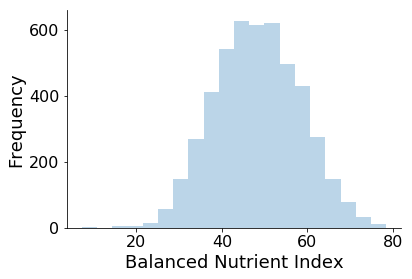

In [25]:
#distribution of ratings, not a lot of dynamic range, probably not useful as app feature to compare recipes
plt.figure()
ax = plt.gca()
db['BNI'].plot.hist(bins=20,alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=16)
plt.xlabel('Balanced Nutrient Index',fontsize=18)
plt.ylabel('Frequency',fontsize=18)

In [26]:
# db.index(max(db['BNI']))

# db.ix[db['HEI'].idxmax()]
print (db.ix[db['BNI'].idxmax()])

recipename             spaghetti casserole i
cluster                                    1
Total Fat                                3.8
Saturated Fat                              1
Cholesterol                               40
Sodium                                   801
Potassium                                674
Total Carbohydrates                     61.8
Dietary Fiber                            3.1
Protein                                   50
Sugars                                    18
Vitamin A                             1473.6
Vitamin C                                 31
Calcium                                  130
Iron                                     4.5
Thiamin                              1.13333
Niacin                                    13
Vitamin B6                              1.25
Magnesium                                 65
Folate                                   314
Calories                                 379
Health Score                        -1.14541
ratings   

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [137]:
# return the recipename of the best BI

print(db['recipename'][db['BNI'].idxmax()])

# alternative way
# db.loc[db['BNI'].idxmax(), 'recipename']

spaghetti casserole i


In [319]:
db = pd.read_csv('recipe_BI_final_v2.csv').set_index('recipename')


In [11]:
db.describe()

,Unnamed: 0,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,...,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000
mean,2393.500000,4.473058,21.002235,7.473893,84.796366,785.141395,476.005013,26.718338,2.552005,49.086508,...,3.243334,3.009363,3.677824,2.617279,0.180528,0.371592,0.602519,0.463377,1.694505,48.344131
std,1382.320874,1.888445,12.866045,5.639837,55.498415,565.837988,251.261351,20.053171,2.240834,24.488201,...,1.236675,1.729950,1.250115,1.704080,0.657061,1.013715,1.371514,1.057085,1.769551,9.953952
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,4.999999,0.000000,0.000000,0.400000,...,0.066860,0.000000,0.106977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.220512
25%,1196.750000,4.000000,11.300000,3.000000,47.000000,378.750001,299.750000,10.200000,0.800000,32.000000,...,2.286320,1.303211,2.691570,1.088436,0.000000,0.000000,0.000000,0.000000,0.000000,41.214386
50%,2393.500000,4.000000,18.800000,6.000000,76.000000,676.500000,438.999999,22.850000,2.000000,48.400000,...,3.167373,2.998466,3.842705,2.391337,0.000000,0.000000,0.000000,0.000000,1.251820,48.218279
75%,3590.250000,5.000000,28.500000,11.000000,115.000000,1046.249999,602.999999,39.300000,3.700000,63.800000,...,4.368975,5.000000,5.000000,4.376945,0.000000,0.000000,0.000000,0.000000,3.241639,55.479381
max,4787.000000,9.000000,73.800000,29.000000,302.000000,3697.999999,1528.000002,102.400000,11.900000,142.400000,...,5.000000,5.000000,5.000000,5.000000,4.764103,5.000000,5.000000,5.000000,5.000000,78.436523


# Barplot

In [9]:
import io
import base64
import seaborn
import urllib.parse
import pandas as pd


db = pd.read_csv('recipe_BI_final_v2.csv').set_index('recipename')

def plot_nutrinfo(nutrfacts):
    '''plot 18 nutrient's % daily values for selected recipe'''

    nutrfacts = nutrfacts*100#remove non-nutrient columns and convert to %
    nutrfacts = nutrfacts.reindex(index=['Total Fat','Saturated Fat','Cholesterol','Sodium', 'Total Carbohydrates','Sugars',
        'Protein','Dietary Fiber','Vitamin A','Vitamin C','Calcium','Iron','Potassium','Thiamin','Niacin','Vitamin B6','Magnesium','Folate'])
    img = io.BytesIO()

    plt.figure(figsize=(10,15))
    g = seaborn.barplot(y=nutrfacts.index,x=nutrfacts.values,color='k',alpha=0.3)
    ax=plt.gca()
    ax.tick_params(labelsize=20)
    plt.xlabel('% Daily Value',fontsize=20)
    plt.ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.axvline(100,linewidth=4,ls=':')
    
    #change x labels to red for nutrients to limit, and green for nutrients to get enough of
    [i.set_color('r') for i in ax.get_yticklabels() if i.get_text() in ['Total Fat','Saturated Fat',
        'Cholesterol','Sodium','Total Carbohydrates','Sugars']]
    [i.set_color('g') for i in ax.get_yticklabels() if i.get_text() in ['Potassium','Dietary Fiber',
        'Protein','Vitamin A','Vitamin C','Calcium','Potassium','Iron']]

    plt.tight_layout()
    plt.savefig(img,format='png')
    img.seek(0)
    plot_url = urllib.parse.quote(base64.b64encode(img.read()).decode())
    
    return plot_url

'iVBORw0KGgoAAAANSUhEUgAAAtAAAAQ4CAYAAAAgkOtJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3XmcjXX/x/H3zNh3Rsg60qKyh9EiS0miLGmjInVP969S3EUkoexFirozdUcbKYVQtFlGiyh3RCIZosg6KdGYuX5/fO7TmTPnzJlzzZyZc%2BT1fDzO48y5zrV8r2Pu7vf5zuf6XDGO4zgCAAAAEJLYSA8AAAAAOJkQoAEAAAAXCNAAAACACwRoAAAAwAUCNAAAAOACARoAAABwgQANAAAAuECABgAAAFwgQAMAAAAuEKABAAAAFwjQAAAAgAsEaAAAAMCFIpEeAICTQ0xMzF8/O44TwZEAABBZzEADAAAALhCgAQAAABcI0AAAAIALBGgAAADABQI0AAAA4AJdOAAAiBKzVu/0ed0rsXaERgIgGAI0AABR4qF5G3xeE6CB6EQJBwAAAOACARoAAABwgRIOAACixE0ta0V6CABCEONwT14AIeBW3gAAGEo4AAAAABcI0AAAAIALBGgAAADABQI0AAAA4AIBGgAAAHCBNnYAAESJLlNTfF4v6t86QiMBEAwBGgCAKPHN7l8jPQQAIaCEAwAAAHCBAA0AAAC4wJ0IAYSEOxECBW/DrjSf1w1rlo/QSAAEwww0Tk6LFkkxMdITT0R6JAAQNg1rlvd5AIhOBOhTXUyMu8fMmXk7zgMP2PZr14Z1%2BCHzBO5gj/37877/AQNsH//9b/7GOWWK/7hiY6Vy5aSWLaVJk6Q///Tfrls37/qffhp8jHPnBt52/vz8jR0AgFMEXThOdSNG%2BC%2BbMkVKS5Puu0%2BqUMH3vSZNCmdcBeWss6RevQK/V6pU4Y4

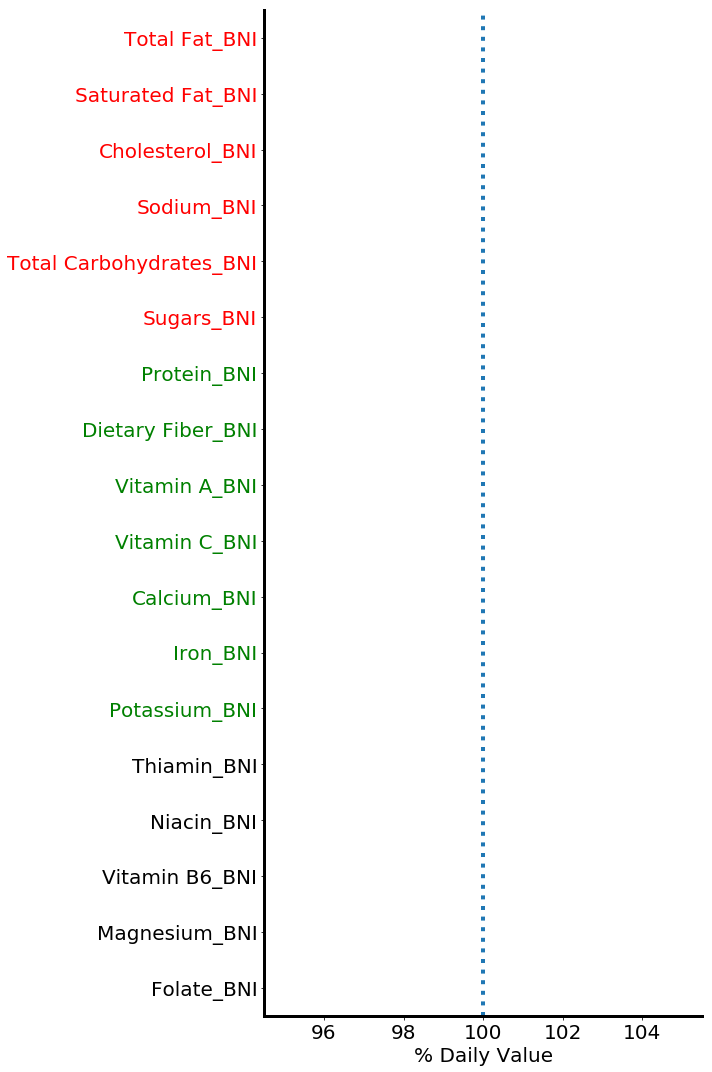

In [14]:
recipe_option = db.iloc[1, 2:20]
plot_nutrinfo(recipe_option*10)

In [106]:
len(recipe_option)

18

In [15]:
import io
import base64
import seaborn
import urllib.parse
import pandas as pd


db = pd.read_csv('recipe_BI_final_v2.csv').set_index('recipename')

def plot_nutrinfo(nutrfacts):
    '''plot 18 nutrient's % daily values for selected recipe'''

    nutrfacts = nutrfacts*100#remove non-nutrient columns and convert to %
    nutrfacts = nutrfacts.reindex(index=['Total Fat_BNI','Saturated Fat_BNI','Cholesterol_BNI','Sodium_BNI', 'Total Carbohydrates_BNI','Sugars_BNI',
        'Protein_BNI','Dietary Fiber_BNI','Vitamin A_BNI','Vitamin C_BNI','Calcium_BNI','Iron_BNI','Potassium_BNI','Thiamin_BNI','Niacin_BNI','Vitamin B6_BNI','Magnesium_BNI','Folate_BNI'])
    img = io.BytesIO()

    plt.figure(figsize=(10,15))
    g = seaborn.barplot(y=nutrfacts.index,x=nutrfacts.values,color='k',alpha=0.3)
    ax=plt.gca()
    ax.tick_params(labelsize=20)
    plt.xlabel('% Daily Value',fontsize=20)
    plt.ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.axvline(20,linewidth=4,ls=':')
    
    #change x labels to red for nutrients to limit, and green for nutrients to get enough of
    [i.set_color('r') for i in ax.get_yticklabels() if i.get_text() in ['Total Fat_BNI','Saturated Fat_BNI',
        'Cholesterol_BNI','Sodium_BNI','Total Carbohydrates_BNI','Sugars_BNI']]
    [i.set_color('g') for i in ax.get_yticklabels() if i.get_text() in ['Potassium_BNI','Dietary Fiber_BNI',
        'Protein_BNI','Vitamin A_BNI','Vitamin C_BNI','Calcium_BNI','Potassium_BNI','Iron_BNI']]

    plt.tight_layout()
    plt.savefig(img,format='png')
    img.seek(0)
    plot_url = urllib.parse.quote(base64.b64encode(img.read()).decode())
    
    return plot_url

In [20]:
nutrfacts = db.reindex(index=['Total Fat_BNI','Saturated Fat_BNI','Cholesterol_BNI','Sodium_BNI', 'Total Carbohydrates_BNI','Sugars_BNI',\
        'Protein_BNI','Dietary Fiber_BNI','Vitamin A_BNI','Vitamin C_BNI','Calcium_BNI','Iron_BNI','Potassium_BNI','Thiamin_BNI','Niacin_BNI','Vitamin B6_BNI','Magnesium_BNI','Folate_BNI'])
nutrfacts 

,Unnamed: 0,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
recipename,,,,,,,,,,,,,,,,,,,,,
Total Fat_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saturated Fat_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sodium_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Carbohydrates_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sugars_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protein_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dietary Fiber_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin A_BNI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
db

,Unnamed: 0,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
recipename,,,,,,,,,,,,,,,,,,,,,
1 dish chicken parmesan,0,4,16.5,5.0,65.0,742.000001,461.000001,37.6,3.1,53.6,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1 dish pepperoni cheese pizza bake,1,4,15.0,6.0,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
1 pea salad most requested,2,3,26.8,3.0,8.0,283.000001,280.000000,17.4,6.0,17.6,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
15 minute herbed chicken,3,6,9.0,2.0,73.0,568.999999,248.000000,7.0,1.2,53.4,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
2 step creamy chicken and pasta,4,7,11.6,3.0,80.0,624.000000,142.000001,30.5,4.3,57.8,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
2 step skillet chicken broccoli divan,5,2,15.6,7.0,90.0,726.000000,420.999999,12.3,3.0,60.8,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
25 minute tunisian vegetable couscous,6,4,4.9,1.0,0.0,699.000000,487.000000,72.1,8.8,27.2,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
3 cheese eggplant lasagna,7,4,16.0,6.0,80.0,2475.000000,787.000000,20.8,4.5,34.6,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
3 ingredient pulled pork barbeque,8,9,16.4,6.0,106.0,922.000001,529.999999,23.9,0.5,64.4,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627


'iVBORw0KGgoAAAANSUhEUgAAAtAAAAQ4CAYAAAAgkOtJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3XmcjXX/x/H3zNh3Rsg60qKyh9EiS0miLGmjInVP969S3EUkoexFirozdUcbKYVQtFlGiyh3RCIZosg6KdGYuX5/fO7TmTPnzJlzzZyZc%2BT1fDzO48y5zrV8r2Pu7vf5zuf6XDGO4zgCAAAAEJLYSA8AAAAAOJkQoAEAAAAXCNAAAACACwRoAAAAwAUCNAAAAOACARoAAABwgQANAAAAuECABgAAAFwgQAMAAAAuEKABAAAAFwjQAAAAgAsEaAAAAMCFIpEeAICTQ0xMzF8/O44TwZEAABBZzEADAAAALhCgAQAAABcI0AAAAIALBGgAAADABQI0AAAA4AJdOAAAiBKzVu/0ed0rsXaERgIgGAI0AABR4qF5G3xeE6CB6EQJBwAAAOACARoAAABwgRIOAACixE0ta0V6CABCEONwT14AIeBW3gAAGEo4AAAAABcI0AAAAIALBGgAAADABQI0AAAA4AIBGgAAAHCBNnYAAESJLlNTfF4v6t86QiMBEAwBGgCAKPHN7l8jPQQAIaCEAwAAAHCBAA0AAAC4wJ0IAYSEOxECBW/DrjSf1w1rlo/QSAAEwww0Tk6LFkkxMdITT0R6JAAQNg1rlvd5AIhOBOhTXUyMu8fMmXk7zgMP2PZr14Z1%2BCHzBO5gj/37877/AQNsH//9b/7GOWWK/7hiY6Vy5aSWLaVJk6Q///Tfrls37/qffhp8jHPnBt52/vz8jR0AgFMEXThOdSNG%2BC%2BbMkVKS5Puu0%2BqUMH3vSZNCmdcBeWss6RevQK/V6pU4Y4

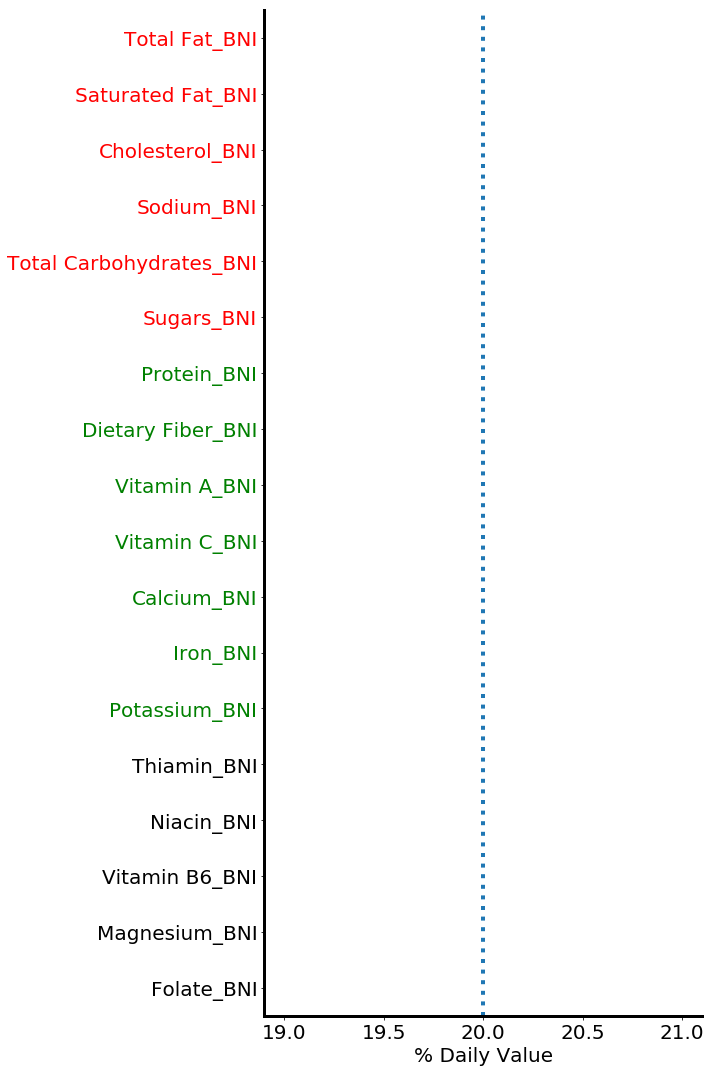

In [16]:
recipe_option = db.iloc[1, 2:20]
plot_nutrinfo(recipe_option*10)

In [13]:
#distribution of ratings, not a lot of dynamic range, probably not useful as app feature to compare recipes
# plt.figure()
# ax = plt.gca()
# db['ratings'].plot.hist(bins=20,alpha=0.3)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.tick_params(labelsize=16)
# plt.xlabel('Rating',fontsize=18)
# plt.ylabel('Frequency',fontsize=18)

In [107]:
recipe_option

Total Fat                 15
Saturated Fat              6
Cholesterol               34
Sodium                   692
Potassium                 97
Total Carbohydrates     32.2
Dietary Fiber            1.3
Protein                 30.6
Sugars                     3
Vitamin A              443.2
Vitamin C                  2
Calcium                  403
Iron                       3
Thiamin                    0
Niacin                     6
Vitamin B6                 0
Magnesium                 19
Folate                   142
Name: 1, dtype: object

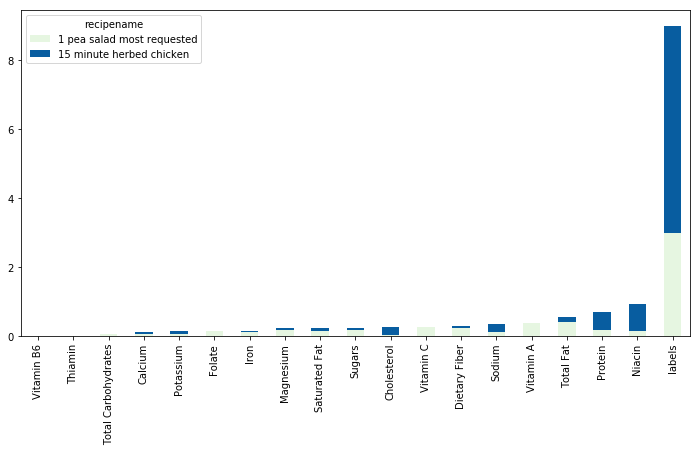

In [218]:
from matplotlib.colors import ListedColormap


recipe_option = db.iloc[2:4, 0:20]   # nutrient of recipe1 i
recipe_option.drop(columns=['labels'])       
recipe_option.set_index('recipename')\
      .reindex(recipe_option.set_index('recipename').sum().sort_values().index, axis=1)\
      .T.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("GnBu", 10)), figsize=(12,6))

In [220]:
recipe_option = db.iloc[2:4, 0:20]   # nutrient of recipe1 i
recipe_option.drop(columns=['labels']) 
recipe_option.head()

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,Sugars,Vitamin A,Vitamin C,Calcium,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate
2,1 pea salad most requested,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,0.176,0.190476,0.3812,0.283333,0.069,0.111111,0.0,0.15,0.0,0.1825,0.1400
3,15 minute herbed chicken,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,0.534,0.063492,0.0148,0.000000,0.048,0.055556,0.0,0.80,0.0,0.0650,0.0125


In [198]:
db.head()

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,4,16.5,5,65.0,742.000001,461.000001,37.6,3.1,53.6,...,3.349515,4.954490,3.676491,3.461165,0.0,0.0,0.000000,0.000000,0.000000,52.671111
1,1 dish pepperoni cheese pizza bake,4,15.0,6,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.0,0.0,1.038501,0.000000,1.671009,41.854926
2,1 pea salad most requested,3,26.8,3,8.0,283.000001,280.000000,17.4,6.0,17.6,...,5.000000,4.834835,2.762763,5.000000,0.0,0.0,4.079079,0.927803,0.000000,51.748457
3,15 minute herbed chicken,6,9.0,2,73.0,568.999999,248.000000,7.0,1.2,53.4,...,3.322222,0.638889,3.621587,2.453333,0.0,0.0,0.000000,0.000000,1.754850,34.032758
4,2 step creamy chicken and pasta,7,11.6,3,80.0,624.000000,142.000001,30.5,4.3,57.8,...,1.606618,0.169118,1.372269,5.000000,0.0,0.0,0.000000,0.000000,0.704949,29.637528


# 2. Create BNI Function

In [49]:
recipe1 = int(input("Please select the recipe that you had before, from 0-4787"))
    

Please select the recipe that you had before, from 0-478750


In [50]:
print('You cureent Balanced Nutrient Index is:')
db.iloc[recipe1]["BNI"]

You cureent Balanced Nutrient Index is:


39.69242263607595

,recipename,cluster,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
1,1 dish pepperoni cheese pizza bake,1,15.0,6.0,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.0,1.671009,41.854926
5,2 step skillet chicken broccoli divan,1,15.6,7.0,90.0,726.000000,420.999999,12.3,3.0,60.8,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.0,1.466974,52.309473
6,25 minute tunisian vegetable couscous,1,4.9,1.0,0.0,699.000000,486.999999,72.1,8.8,27.2,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.0,0.283212,73.140800
7,3 cheese eggplant lasagna,1,16.0,6.0,80.0,2475.000000,787.000001,20.8,4.5,34.6,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,57.797661
9,30 minute irish skillet,1,19.3,6.0,52.0,714.000000,336.000000,24.6,4.1,33.6,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.0,0.730066,41.786726


In [53]:
# load difference matrix saved before

dist_matrix_transpose = np.loadtxt('dist_matrix_transpose.csv', delimiter=",")
dist_matrix_transpose

array([[0.        , 0.11222753, 0.14415957, 0.1008059 , 0.10824093,
        0.11501826, 0.11270737, 0.10154986, 0.10356166, 0.10172892],
       [0.12143216, 0.        , 0.13657942, 0.10988399, 0.10784721,
        0.09908221, 0.09949564, 0.11325392, 0.10653505, 0.1058904 ],
       [0.12054657, 0.10555099, 0.        , 0.11038122, 0.11159968,
        0.10547564, 0.10757248, 0.11423621, 0.11349832, 0.11113889],
       [0.11177779, 0.11260811, 0.14637044, 0.        , 0.10481612,
        0.11244275, 0.09931446, 0.10610613, 0.09990919, 0.10665499],
       [0.11990377, 0.11041191, 0.14784032, 0.10471282, 0.        ,
        0.1138853 , 0.09833712, 0.0952814 , 0.09792293, 0.11170443],
       [0.12136656, 0.09662592, 0.13309846, 0.10700255, 0.10848223,
        0.        , 0.10591113, 0.10778858, 0.1102333 , 0.10949126],
       [0.12631059, 0.10305218, 0.14417078, 0.10037611, 0.09948637,
        0.11248557, 0.        , 0.10746374, 0.10279227, 0.10386239],
       [0.11192013, 0.11535802, 0.1505640

In [55]:
cluster_index = db[db['cluster']]
a = [row[cluster_index] for row in dist_matrix_transpose]

[0.14415957168321067,
 0.13657941880004987,
 0.0,
 0.1463704406457101,
 0.14784031675946388,
 0.1330984615088482,
 0.14417078048910234,
 0.15056404671809517,
 0.15227372366508926,
 0.14544302001895235]

In [138]:
db

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,4,16.5,5.0,65.0,742.000001,461.000001,37.6,3.1,53.6,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1,1 dish pepperoni cheese pizza bake,4,15.0,6.0,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
2,1 pea salad most requested,3,26.8,3.0,8.0,283.000001,280.000000,17.4,6.0,17.6,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
3,15 minute herbed chicken,6,9.0,2.0,73.0,568.999999,248.000000,7.0,1.2,53.4,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
4,2 step creamy chicken and pasta,7,11.6,3.0,80.0,624.000000,142.000001,30.5,4.3,57.8,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
5,2 step skillet chicken broccoli divan,2,15.6,7.0,90.0,726.000000,420.999999,12.3,3.0,60.8,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
6,25 minute tunisian vegetable couscous,4,4.9,1.0,0.0,699.000000,486.999999,72.1,8.8,27.2,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
7,3 cheese eggplant lasagna,4,16.0,6.0,80.0,2475.000000,787.000001,20.8,4.5,34.6,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
8,3 ingredient pulled pork barbeque,9,16.4,6.0,106.0,922.000001,529.999998,23.9,0.5,64.4,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627
9,30 minute irish skillet,4,19.3,6.0,52.0,714.000000,336.000000,24.6,4.1,33.6,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.000000,0.730066,41.786726


# Global Max

In [181]:
db_global = db_global.iloc[:,:20]

TypeError: cannot perform reduce with flexible type

In [179]:
# db_global = pd.read_csv('recipe_BI_final.csv')

In [185]:
db

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,1 dish chicken parmesan,4,16.5,5.0,65.0,742.000001,461.000001,37.6,3.1,53.6,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1,1 dish pepperoni cheese pizza bake,4,15.0,6.0,34.0,691.999999,97.000001,32.2,1.3,30.6,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
2,1 pea salad most requested,3,26.8,3.0,8.0,283.000001,280.000000,17.4,6.0,17.6,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
3,15 minute herbed chicken,6,9.0,2.0,73.0,568.999999,248.000000,7.0,1.2,53.4,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
4,2 step creamy chicken and pasta,7,11.6,3.0,80.0,624.000000,142.000001,30.5,4.3,57.8,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
5,2 step skillet chicken broccoli divan,2,15.6,7.0,90.0,726.000000,420.999999,12.3,3.0,60.8,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
6,25 minute tunisian vegetable couscous,4,4.9,1.0,0.0,699.000000,486.999999,72.1,8.8,27.2,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
7,3 cheese eggplant lasagna,4,16.0,6.0,80.0,2475.000000,787.000001,20.8,4.5,34.6,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
8,3 ingredient pulled pork barbeque,9,16.4,6.0,106.0,922.000001,529.999998,23.9,0.5,64.4,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627
9,30 minute irish skillet,4,19.3,6.0,52.0,714.000000,336.000000,24.6,4.1,33.6,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.000000,0.730066,41.786726


In [182]:
db_global.loc[['1 dish chicken parmesan'], ['Total Fat','Saturated Fat','Cholesterol','Sodium','Total Carbohydrates','Sugars',
		'Protein','Dietary Fiber','Vitamin A','Vitamin C','Calcium','Potassium','Iron','Thiamin','Niacin','Vitamin B6','Magnesium','Folate', 'Calories']]

,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrates,Sugars,Protein,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Potassium,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories
recipename,,,,,,,,,,,,,,,,,,,
1 dish chicken parmesan,16.5,5,65.0,742.000001,37.6,9.0,53.6,3.1,902.4,2.0,240.5,461.000001,4.5,0.0,17,1.25,48,142,412


In [184]:
db_global

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Vitamin A,Vitamin C,Calcium,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories
0,1 dish chicken parmesan,4,16.5,5,65.0,742.000001,461.000001,37.6,3.1,53.6,...,902.4,2.0,240.5,4.5,0.000000,17,1.25,48,142,412
1,1 dish pepperoni cheese pizza bake,4,15.0,6,34.0,691.999999,97.000001,32.2,1.3,30.6,...,443.2,2.0,403.0,3.0,0.000000,6,0.00,19,142,329
2,1 pea salad most requested,3,26.8,3,8.0,283.000001,280.000000,17.4,6.0,17.6,...,3049.6,17.0,89.7,3.0,0.000000,3,0.00,73,112,333
3,15 minute herbed chicken,6,9.0,2,73.0,568.999999,248.000000,7.0,1.2,53.4,...,118.4,0.0,62.4,1.5,0.000000,16,0.00,26,10,225
4,2 step creamy chicken and pasta,7,11.6,3,80.0,624.000000,142.000001,30.5,4.3,57.8,...,22.4,0.0,14.3,1.5,0.000000,11,0.00,19,4,340
5,2 step skillet chicken broccoli divan,2,15.6,7,90.0,726.000000,420.999999,12.3,3.0,60.8,...,1171.2,62.0,235.3,1.5,0.000000,12,0.00,40,100,310
6,25 minute tunisian vegetable couscous,4,4.9,1,0.0,699.000000,487.000000,72.1,8.8,27.2,...,3272.0,53.0,109.2,4.5,0.000000,6,1.25,68,172,387
7,3 cheese eggplant lasagna,4,16.0,6,80.0,2475.000000,787.000000,20.8,4.5,34.6,...,10364.8,18.0,557.7,4.5,0.000000,5,0.00,65,136,285
8,3 ingredient pulled pork barbeque,9,16.4,6,106.0,922.000001,529.999999,23.9,0.5,64.4,...,244.8,1.0,54.6,3.0,1.133333,12,1.25,32,6,382
9,30 minute irish skillet,4,19.3,6,52.0,714.000000,336.000000,24.6,4.1,33.6,...,99.2,23.0,46.8,3.0,0.000000,6,0.00,22,68,342


In [314]:
def BNI_Global(recipename):   # for 1 input
# def BNI_func(recipe1_id, recipe2_id):   # for two inputs
#     db.loc[[recipename]]
    BNI_total = {}
    recipe1_input = db.loc[[recipename], \
                                  ['Total Fat','Saturated Fat','Cholesterol','Sodium', 'Total Carbohydrates','Sugars', \
                                   'Protein','Dietary Fiber','Vitamin A','Vitamin C','Calcium','Potassium','Iron',\
                                   'Thiamin','Niacin','Vitamin B6','Magnesium','Folate', 'Calories', 'BNI']]
   #  recipe1_input = db.iloc[recipe1_id:(recipe1_id + 1), 0:21]   # nutrient of recipe1
#        recipe2_input = db.iloc[recipe2_id:(recipe2_id + 1), 0:21]   # nutrient of recipe2
    recipe1_input.reset_index(level=0, inplace=True)
    db.reset_index(level=0, inplace=True)
    

    
    for i in range(db.shape[0]):
  #   for index, row in df.iterrows():   
        recipe_option = db.iloc[i:i+1, 0:21]   # nutrient of recipe1 i
       
        # append into one dataframe
        recipe_all = recipe1_input.append(recipe_option, ignore_index=True)    
        recipe_all.loc['Total']= recipe_all.sum()
        

        # standardized to 20000 Kcal intake
        recipe_all['Carb_std'] = recipe_all['Total Carbohydrates'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Protein_std'] = recipe_all['Protein'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitA_std'] = recipe_all['Vitamin A'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitC_std'] = recipe_all['Vitamin C'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Calcium_std'] = recipe_all['Calcium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Iron_std'] = recipe_all['Iron'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Thiamin_std'] = recipe_all['Thiamin'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Niacin_std'] = recipe_all['Niacin'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitB6_std'] = recipe_all['Vitamin B6'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Magnesium_std'] = recipe_all['Magnesium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Folate_std'] = recipe_all['Folate'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Potassium_std'] = recipe_all['Potassium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Dietary Fiber_std'] = recipe_all['Dietary Fiber'] / recipe_all['Calories'] * dailyvals['Energy']
        # moderate nutrient
        recipe_all['Total Fat_std'] = recipe_all['Total Fat'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Saturated Fat_std'] = recipe_all['Saturated Fat'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Cholesterol_std'] = recipe_all['Cholesterol'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Sodium_std'] = recipe_all['Sodium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Sugars_std'] = recipe_all['Sugars'] / recipe_all['Calories'] * dailyvals['Energy']

        # calculate the BNI
        recipe_all['Carb_BNI'] = [x / dailyvals['Total Carbohydrates'] * 5 if x < dailyvals['Total Carbohydrates'] else 5 for x in recipe_all['Carb_std']]
        recipe_all['Protein_BNI'] = [x / dailyvals['Protein'] * 15 if x < dailyvals['Protein'] else 15 for x in recipe_all['Protein_std']]
        recipe_all['VitA_BNI'] = [x / dailyvals['Vitamin A'] * 5 if x < dailyvals['Vitamin A'] else 5 for x in recipe_all['VitA_std']]
        recipe_all['VitC_BNI'] = [x / dailyvals['Vitamin C'] * 5 if x < dailyvals['Vitamin C'] else 5 for x in recipe_all['VitC_std']]
        recipe_all['Calcium_BNI'] = [x / dailyvals['Calcium'] * 5 if x < dailyvals['Calcium'] else 5 for x in recipe_all['Calcium_std']]
        recipe_all['Iron_BNI'] = [x / dailyvals['Iron'] * 5 if x < dailyvals['Iron'] else 5 for x in recipe_all['Iron_std']]
        recipe_all['Thiamin_BNI'] = [x / dailyvals['Thiamin'] * 5 if x < dailyvals['Thiamin'] else 5 for x in recipe_all['Thiamin_std']]
        recipe_all['Niacin_BNI'] = [x / dailyvals['Niacin'] * 5 if x < dailyvals['Niacin'] else 5 for x in recipe_all['Niacin_std']]
        recipe_all['VitB6_BNI'] = [x / dailyvals['Vitamin B6'] * 5 if x < dailyvals['Vitamin B6'] else 5 for x in recipe_all['VitB6_std']]
        recipe_all['Magnesium_BNI'] = [x / dailyvals['Magnesium'] * 5 if x < dailyvals['Magnesium'] else 5 for x in recipe_all['Magnesium_std']]
        recipe_all['Folate_BNI'] = [x / dailyvals['Folate'] * 5 if x < dailyvals['Folate'] else 5 for x in recipe_all['Folate_std']]
        recipe_all['Potassium_BNI'] = [x / dailyvals['Potassium'] * 5 if x < dailyvals['Potassium'] else 5 for x in recipe_all['Potassium_std']]
        recipe_all['Dietary Fiber_BNI'] = [x / dailyvals['Dietary Fiber'] * 5 if x < dailyvals['Dietary Fiber'] else 5 for x in recipe_all['Dietary Fiber_std']]
       
        # nutrient of moderate intake
        recipe_all['Total Fat_BNI'] = [(dailyvals['Total Fat'] - x) / dailyvals['Total Fat'] * 5 if x < dailyvals['Total Fat'] else 0 for x in recipe_all['Total Fat_std'] ]
        recipe_all['Saturated Fat_BNI'] = [(dailyvals['Saturated Fat'] - x) / dailyvals['Saturated Fat'] * 5 if x < dailyvals['Saturated Fat'] else 0 for x in recipe_all['Saturated Fat_std'] ]
        recipe_all['Cholesterol_BNI'] = [(dailyvals['Cholesterol'] - x) / dailyvals['Cholesterol'] * 5 if x < dailyvals['Cholesterol'] else 0 for x in recipe_all['Cholesterol_std'] ]
        recipe_all['Sodium_BNI'] = [(dailyvals['Sodium'] - x) / dailyvals['Sodium'] * 5 if x < dailyvals['Sodium'] else 0 for x in recipe_all['Sodium_std'] ]
        recipe_all['Sugars_BNI'] = [(dailyvals['Sugars'] - x) / dailyvals['Sugars'] * 5 if x < dailyvals['Sugars'] else 0 for x in recipe_all['Sugars_std'] ]


        # total BNI
        recipe_all['BNI_best'] = recipe_all['Carb_BNI'] + recipe_all['Protein_BNI'] + recipe_all['VitA_BNI'] + recipe_all['VitC_BNI'] + recipe_all['Calcium_BNI'] + recipe_all['Iron_BNI'] + \
                    recipe_all['Thiamin_BNI'] + recipe_all['Niacin_BNI'] + recipe_all['VitB6_BNI'] + recipe_all['Magnesium_BNI'] + recipe_all['Folate_BNI'] + recipe_all['Potassium_BNI'] + \
                    recipe_all['Dietary Fiber_BNI'] + recipe_all['Total Fat_BNI'] + recipe_all['Saturated Fat_BNI'] + recipe_all['Sodium_BNI'] + recipe_all['Sugars_BNI']

   #      recipe_all.round({'BNI': 2})
        

#        BNI_total.update({recipe_all.iloc[2]['recipename'] : recipe_all.iloc[3]['BNI']})  # for two input
        BNI_total.update({recipe_all.iloc[1]['recipename'] : recipe_all.iloc[2]['BNI_best']})    # for one input
    
    
    for key, value in sorted(BNI_total.items(), key=lambda item: (item[1], item[0])):
        Best_recipe = (key, value.round(1))
    
    return f"{Best_recipe[0]}    BI score:{Best_recipe[1].round()}"




# test on the Global recommendation
import time
db = pd.read_csv('recipe_BI_final_v2.csv').set_index('recipename')
start = time.time()
BNI_Global_Recipe = BNI_Global('1 dish chicken parmesan')
end = time.time()
print(end - start)  

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


123.2152669429779


In [315]:
BNI_Global_Recipe


'ziti and eggplant    BI score:75.0'

In [225]:
a = BNI_Global_Recipe[1]
type(a)

numpy.float64

In [196]:




f"The recipe matches best to your eating history is {BNI_Global_Recipe[0]} with your Balance Index increases to {BNI_Global_Recipe[1].round()}")






'The recipe matches best to your eating history is fresh veggie bagel sandwich with your Balance Index increases to 75.0'

In [49]:
import time



start = time.time()
BNI_Global_Recipe = BNI_Global('1 dish chicken parmesan')
end = time.time()
print(end - start)

119.09030890464783


In [51]:
type(y)

tuple

In [238]:
db = pd.read_csv('recipe_BI_final.csv')
db

,Unnamed: 0,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,0,1 dish chicken parmesan,4,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1,1,1 dish pepperoni cheese pizza bake,4,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
2,2,1 pea salad most requested,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
3,3,15 minute herbed chicken,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
4,4,2 step creamy chicken and pasta,7,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
5,5,2 step skillet chicken broccoli divan,2,0.240000,0.35,0.300000,0.302500,0.120286,0.041000,0.120,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
6,6,25 minute tunisian vegetable couscous,4,0.075385,0.05,0.000000,0.291250,0.139143,0.240333,0.352,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
7,7,3 cheese eggplant lasagna,4,0.246154,0.30,0.266667,1.031250,0.224857,0.069333,0.180,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
8,8,3 ingredient pulled pork barbeque,9,0.252308,0.30,0.353333,0.384167,0.151429,0.079667,0.020,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627
9,9,30 minute irish skillet,4,0.296923,0.30,0.173333,0.297500,0.096000,0.082000,0.164,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.000000,0.730066,41.786726


# Local search based on the Optmal recommendation


In [282]:
#


In [283]:
db

,Unnamed: 0,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
0,0,1 dish chicken parmesan,4,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1,1,1 dish pepperoni cheese pizza bake,4,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
2,2,1 pea salad most requested,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
3,3,15 minute herbed chicken,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
4,4,2 step creamy chicken and pasta,7,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
5,5,2 step skillet chicken broccoli divan,2,0.240000,0.35,0.300000,0.302500,0.120286,0.041000,0.120,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
6,6,25 minute tunisian vegetable couscous,4,0.075385,0.05,0.000000,0.291250,0.139143,0.240333,0.352,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
7,7,3 cheese eggplant lasagna,4,0.246154,0.30,0.266667,1.031250,0.224857,0.069333,0.180,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
8,8,3 ingredient pulled pork barbeque,9,0.252308,0.30,0.353333,0.384167,0.151429,0.079667,0.020,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627
9,9,30 minute irish skillet,4,0.296923,0.30,0.173333,0.297500,0.096000,0.082000,0.164,...,1.849415,2.858187,3.228070,5.000000,0.000000,0.000000,0.000000,0.000000,0.730066,41.786726


In [284]:
BNI_func(50, 0.02)

,recipename,BNI_local
1328,grilled tuna with fresh horseradish,32.36
299,blackened tuna steaks with mango salsa,31.41
1327,grilled tuna teriyaki,31.14
1009,easy teriyaki chops,30.90
1263,grilled citrus tuna,30.87
173,baked soy lemon chops,30.72
2436,souvlaki,30.72
2328,seared tuna with wasabi butter sauce,30.54
516,chef johns hawaiian style ahi poke,30.54
878,delicious ahi fish burgers with chives,30.38


In [316]:
def BNI_local(recipename, similarity):   # for 1 input  
    db = pd.read_csv('app_data/recipe_BI_final_v2.csv').set_index('recipename')
    dist_matrix_transpose = np.loadtxt('app_data/dist_matrix_transpose.csv', delimiter=",")

        
   
    recipe1_input = db.loc[[recipename], \
                        ['labels','Total Fat','Saturated Fat','Cholesterol','Sodium', 'Total Carbohydrates','Sugars', \
                        'Protein','Dietary Fiber','Vitamin A','Vitamin C','Calcium','Potassium','Iron',\
                        'Thiamin','Niacin','Vitamin B6','Magnesium','Folate', 'Calories', 'BNI']]

 
    # reset index 
    recipe1_input.reset_index(level=0, inplace=True)
    db.reset_index(level=0, inplace=True)
    
    cluster_index = recipe1_input['labels']
    a = [row[cluster_index] for row in dist_matrix_transpose]
    cluster_option = min(enumerate(a), key=lambda x: abs(x[1]-similarity))
    db_sub = db[db['labels']==cluster_option[0]] 

  #   recipe1_input = db.iloc[recipe1_id:(recipe1_id + 1), 0:21]   # nutrient of recipe1

    BNI_total = {}
    for i in range(db_sub.shape[0]):
  #   for index, row in df.iterrows():   
        recipe_option = db_sub.iloc[i:i+1, 0:22]   # nutrient of recipe1 i
       
        # append into one dataframe
        recipe_all = recipe1_input.append(recipe_option, ignore_index=True)    
        recipe_all.loc['Total']= recipe_all.sum()
        

        # standardized to 20000 Kcal intake
        recipe_all['Carb_std'] = recipe_all['Total Carbohydrates'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Protein_std'] = recipe_all['Protein'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitA_std'] = recipe_all['Vitamin A'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitC_std'] = recipe_all['Vitamin C'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Calcium_std'] = recipe_all['Calcium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Iron_std'] = recipe_all['Iron'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Thiamin_std'] = recipe_all['Thiamin'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Niacin_std'] = recipe_all['Niacin'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitB6_std'] = recipe_all['Vitamin B6'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Magnesium_std'] = recipe_all['Magnesium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Folate_std'] = recipe_all['Folate'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Potassium_std'] = recipe_all['Potassium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Dietary Fiber_std'] = recipe_all['Dietary Fiber'] / recipe_all['Calories'] * dailyvals['Energy']
        # moderate nutrient
        recipe_all['Total Fat_std'] = recipe_all['Total Fat'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Saturated Fat_std'] = recipe_all['Saturated Fat'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Cholesterol_std'] = recipe_all['Cholesterol'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Sodium_std'] = recipe_all['Sodium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Sugars_std'] = recipe_all['Sugars'] / recipe_all['Calories'] * dailyvals['Energy']

        # calculate the BNI
        recipe_all['Carb_BNI'] = [x / dailyvals['Total Carbohydrates'] * 5 if x < dailyvals['Total Carbohydrates'] else 5 for x in recipe_all['Carb_std']]
        recipe_all['Protein_BNI'] = [x / dailyvals['Protein'] * 15 if x < dailyvals['Protein'] else 15 for x in recipe_all['Protein_std']]
        recipe_all['VitA_BNI'] = [x / dailyvals['Vitamin A'] * 5 if x < dailyvals['Vitamin A'] else 5 for x in recipe_all['VitA_std']]
        recipe_all['VitC_BNI'] = [x / dailyvals['Vitamin C'] * 5 if x < dailyvals['Vitamin C'] else 5 for x in recipe_all['VitC_std']]
        recipe_all['Calcium_BNI'] = [x / dailyvals['Calcium'] * 5 if x < dailyvals['Calcium'] else 5 for x in recipe_all['Calcium_std']]
        recipe_all['Iron_BNI'] = [x / dailyvals['Iron'] * 5 if x < dailyvals['Iron'] else 5 for x in recipe_all['Iron_std']]
        recipe_all['Thiamin_BNI'] = [x / dailyvals['Thiamin'] * 5 if x < dailyvals['Thiamin'] else 5 for x in recipe_all['Thiamin_std']]
        recipe_all['Niacin_BNI'] = [x / dailyvals['Niacin'] * 5 if x < dailyvals['Niacin'] else 5 for x in recipe_all['Niacin_std']]
        recipe_all['VitB6_BNI'] = [x / dailyvals['Vitamin B6'] * 5 if x < dailyvals['Vitamin B6'] else 5 for x in recipe_all['VitB6_std']]
        recipe_all['Magnesium_BNI'] = [x / dailyvals['Magnesium'] * 5 if x < dailyvals['Magnesium'] else 5 for x in recipe_all['Magnesium_std']]
        recipe_all['Folate_BNI'] = [x / dailyvals['Folate'] * 5 if x < dailyvals['Folate'] else 5 for x in recipe_all['Folate_std']]
        recipe_all['Potassium_BNI'] = [x / dailyvals['Potassium'] * 5 if x < dailyvals['Potassium'] else 5 for x in recipe_all['Potassium_std']]
        recipe_all['Dietary Fiber_BNI'] = [x / dailyvals['Dietary Fiber'] * 5 if x < dailyvals['Dietary Fiber'] else 5 for x in recipe_all['Dietary Fiber_std']]
       
        # nutrient of moderate intake
        recipe_all['Total Fat_BNI'] = [(dailyvals['Total Fat'] - x) / dailyvals['Total Fat'] * 5 if x < dailyvals['Total Fat'] else 0 for x in recipe_all['Total Fat_std'] ]
        recipe_all['Saturated Fat_BNI'] = [(dailyvals['Saturated Fat'] - x) / dailyvals['Saturated Fat'] * 5 if x < dailyvals['Saturated Fat'] else 0 for x in recipe_all['Saturated Fat_std'] ]
        recipe_all['Cholesterol_BNI'] = [(dailyvals['Cholesterol'] - x) / dailyvals['Cholesterol'] * 5 if x < dailyvals['Cholesterol'] else 0 for x in recipe_all['Cholesterol_std'] ]
        recipe_all['Sodium_BNI'] = [(dailyvals['Sodium'] - x) / dailyvals['Sodium'] * 5 if x < dailyvals['Sodium'] else 0 for x in recipe_all['Sodium_std'] ]
        recipe_all['Sugars_BNI'] = [(dailyvals['Sugars'] - x) / dailyvals['Sugars'] * 5 if x < dailyvals['Sugars'] else 0 for x in recipe_all['Sugars_std'] ]


        # total BNI
        recipe_all['BNI_local'] = recipe_all['Carb_BNI'] + recipe_all['Protein_BNI'] + recipe_all['VitA_BNI'] + recipe_all['VitC_BNI'] + recipe_all['Calcium_BNI'] + recipe_all['Iron_BNI'] + \
                    recipe_all['Thiamin_BNI'] + recipe_all['Niacin_BNI'] + recipe_all['VitB6_BNI'] + recipe_all['Magnesium_BNI'] + recipe_all['Folate_BNI'] + recipe_all['Potassium_BNI'] + \
                    recipe_all['Dietary Fiber_BNI'] + recipe_all['Total Fat_BNI'] + recipe_all['Saturated Fat_BNI'] + recipe_all['Sodium_BNI'] + recipe_all['Sugars_BNI']

   #      recipe_all.round({'BNI': 2})
        

#        BNI_total.update({recipe_all.iloc[2]['recipename'] : recipe_all.iloc[3]['BNI']})  # for two input
        BNI_total.update({recipe_all.iloc[1]['recipename'] : recipe_all.iloc[2]['BNI_local']})    # for one input
    
    
#     for key, value in sorted(BNI_total.items(), key=lambda item: (item[1], item[0])):
#         Best_recipe = (key, value.round(1))
  
    local_recipes = pd.DataFrame(list(BNI_total.items()), columns=['recipename', 'BNI_local']).round({'BNI_local' : 2}) \
           .sort_values(by = 'BNI_local', ascending = False)
    
    return local_recipes.head(5)         
        
#     return f"{Best_recipe[0]}    BI score:{Best_recipe[1].round()}")


import time
db = pd.read_csv('recipe_BI_final_v2.csv').set_index('recipename')
start = time.time()
BNI_local_recipe, recipe_all = BNI_local('1 dish chicken parmesan', 0.5)
end = time.time()
print(end - start)  



In [317]:
#   db = pd.read_csv('recipe_BI_final.csv').set_index('recipename')
 
# test on the Global recommendation
import time
db = pd.read_csv('recipe_BI_final_v2.csv').set_index('recipename')
start = time.time()
BNI_local_recipe, recipe_all = BNI_local('1 dish chicken parmesan', 0.5)
end = time.time()
print(end - start)  

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2.7235779762268066


In [318]:
BNI_local_recipe

,recipename,BNI_local
6,bacon broccoli salad with raisins and sunflowe...,68.84
89,utokias ginger shrimp and broccoli with garlic,67.58
38,chicken broccoli ca uniengs style,67.09
2,andreas broccoli slaw,66.67
71,pork broccoli and rice casserole,66.48
28,broccoli salad with margarita dressing,66.20
14,broccoli and chicken stir fry,65.64
80,sweet and spicy stir fry with chicken and broc...,65.52
86,trees seeds and beans broccoli slaw,65.08
21,broccoli chicken divan,64.96


In [298]:
recipe_all

,BNI,Calcium,Calories,Cholesterol,Dietary Fiber,Folate,Iron,Magnesium,Niacin,Potassium,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI_local
0,52.671111,0.185,412,0.216667,0.124,0.1775,0.166667,0.12,0.85,0.131714,...,0.008374,0.006193,0.001050,0.138447,4.890992,4.651092,4.979841,4.996404,4.746824,26.278332
1,NaN,0.048,107,0.000000,0.180,0.1525,0.111111,0.11,0.10,0.123714,...,0.029556,0.020488,0.003799,0.773832,4.931317,5.000000,5.000000,4.996828,4.675052,22.235322
Total,52.671111,0.233,519,0.216667,0.304,0.3300,0.277778,0.23,0.95,0.255429,...,0.012741,0.009140,0.001617,0.269441,4.899306,4.723025,4.983997,4.996492,4.732027,25.907230


In [270]:
recipe1_input = db.loc[['1 dish chicken parmesan'], \
                        ['labels','Total Fat','Saturated Fat','Cholesterol','Sodium', 'Total Carbohydrates','Sugars', \
                        'Protein','Dietary Fiber','Vitamin A','Vitamin C','Calcium','Potassium','Iron',\
                        'Thiamin','Niacin','Vitamin B6','Magnesium','Folate', 'Calories', 'BNI']]

In [52]:
import operator
sorted_y = sorted(y.items(), key=operator.itemgetter(1))

In [271]:
recipe1_input

,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrates,Sugars,Protein,Dietary Fiber,Vitamin A,...,Calcium,Potassium,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories,BNI
recipename,,,,,,,,,,,,,,,,,,,,,
1 dish chicken parmesan,4,0.253846,0.25,0.216667,0.309167,0.125333,0.285714,0.536,0.124,0.1128,...,0.185,0.131714,0.166667,0.0,0.85,0.5,0.12,0.1775,412,52.671111


In [294]:
db



,Unnamed: 0,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Magnesium_BNI,Folate_BNI,Potassium_BNI,Dietary Fiber_BNI,Total Fat_BNI,Saturated Fat_BNI,Cholesterol_BNI,Sodium_BNI,Sugars_BNI,BNI
recipename,,,,,,,,,,,,,,,,,,,,,
1 dish chicken parmesan,0,4,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,0.536,...,3.349515,4.954490,3.676491,3.461165,0.000000,0.000000,0.000000,0.000000,0.000000,52.671111
1 dish pepperoni cheese pizza bake,1,4,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,0.306,...,1.660334,5.000000,0.968736,1.817629,0.000000,0.000000,1.038501,0.000000,1.671009,41.854926
1 pea salad most requested,2,3,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,0.176,...,5.000000,4.834835,2.762763,5.000000,0.000000,0.000000,4.079079,0.927803,0.000000,51.748457
15 minute herbed chicken,3,6,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,0.534,...,3.322222,0.638889,3.621587,2.453333,0.000000,0.000000,0.000000,0.000000,1.754850,34.032758
2 step creamy chicken and pasta,4,7,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,0.578,...,1.606618,0.169118,1.372269,5.000000,0.000000,0.000000,0.000000,0.000000,0.704949,29.637528
2 step skillet chicken broccoli divan,5,2,0.240000,0.35,0.300000,0.302500,0.120286,0.041000,0.120,0.608,...,3.709677,4.637097,4.462212,4.451613,0.000000,0.000000,0.000000,0.000000,1.466974,52.309473
25 minute tunisian vegetable couscous,6,4,0.075385,0.05,0.000000,0.291250,0.139143,0.240333,0.352,0.272,...,5.000000,5.000000,4.134736,5.000000,2.759889,3.514212,5.000000,0.000000,0.283212,73.140800
3 cheese eggplant lasagna,7,4,0.246154,0.30,0.266667,1.031250,0.224857,0.069333,0.180,0.346,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.797661
3 ingredient pulled pork barbeque,8,9,0.252308,0.30,0.353333,0.384167,0.151429,0.079667,0.020,0.644,...,2.408377,0.225785,4.558714,0.602094,0.000000,0.000000,0.000000,0.000000,0.000000,41.225627


In [26]:
import operator

max(y.items(), key=operator.itemgetter(1))[0]

'chef johns spaghetti al tonno'

In [45]:
y_decending

('chef johns spaghetti al tonno', 73.41926612763713)

In [24]:

stats = {'a':1000, 'b':3000, 'c': 100}
type(stats)

dict

AttributeError: 'dict' object has no attribute 'iteritems'

In [ ]:
# Local search of recipes with BNI
# db = pd.read_csv('recipe_BI_final.csv').set_index('recipename')

db = pd.read_csv('recipe_BI_final.csv')
def BNI_func(recipe1_id, similarity):   # for 1 input
# def BNI_func(recipe1_id, recipe2_id):   # for two inputs
    BNI_total = {}
    
    
    # get the proper cluster that fit the user's requirement
    # user input on how much the similarity they want
#     similarity = 0.5   # input between [0,1]
    cluster_index = 4   # input between [0,9], the numbers of clusters.

    # get the cluster index based on user's input

    a = [row[cluster_index] for row in dist_matrix_transpose]
    cluster_option = min(enumerate(a), key=lambda x: abs(x[1]-similarity))
    db_sub = db[db['labels']==cluster_option[0]] 

    recipe1_input = db.iloc[recipe1_id:(recipe1_id + 1), 0:22]   # nutrient of recipe1
#        recipe2_input = db.iloc[recipe2_id:(recipe2_id + 1), 0:21]   # nutrient of recipe2

    for i in range(db_sub.shape[0]):
#         BNI1 = [None] * 2

        recipe_option = db_sub.iloc[i:i+1, 0:22]   # nutrient of recipe1 i
        # append into one dataframe
#        recipe3 = recipe1_input.append(recipe2_input, ignore_index=True)
#        recipe_all = recipe3.append(recipe_option, ignore_index=True)
        recipe_all = recipe1_input.append(recipe_option, ignore_index=True)
    
        recipe_all.loc['Total']= recipe_all.sum()
        

        # standardized to 20000 Kcal intake
        recipe_all['Carb_std'] = recipe_all['Total Carbohydrates'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Protein_std'] = recipe_all['Protein'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitA_std'] = recipe_all['Vitamin A'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitC_std'] = recipe_all['Vitamin C'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Calcium_std'] = recipe_all['Calcium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Iron_std'] = recipe_all['Iron'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Thiamin_std'] = recipe_all['Thiamin'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Niacin_std'] = recipe_all['Niacin'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['VitB6_std'] = recipe_all['Vitamin B6'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Magnesium_std'] = recipe_all['Magnesium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Folate_std'] = recipe_all['Folate'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Potassium_std'] = recipe_all['Potassium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Dietary Fiber_std'] = recipe_all['Dietary Fiber'] / recipe_all['Calories'] * dailyvals['Energy']
        # moderate nutrient
        recipe_all['Total Fat_std'] = recipe_all['Total Fat'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Saturated Fat_std'] = recipe_all['Saturated Fat'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Cholesterol_std'] = recipe_all['Cholesterol'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Sodium_std'] = recipe_all['Sodium'] / recipe_all['Calories'] * dailyvals['Energy']
        recipe_all['Sugars_std'] = recipe_all['Sugars'] / recipe_all['Calories'] * dailyvals['Energy']

        # calculate the BNI
        recipe_all['Carb_BNI'] = [x / dailyvals['Total Carbohydrates'] * 5 if x < dailyvals['Total Carbohydrates'] else 5 for x in recipe_all['Carb_std']]
        recipe_all['Protein_BNI'] = [x / dailyvals['Protein'] * 15 if x < dailyvals['Protein'] else 15 for x in recipe_all['Protein_std']]
        recipe_all['VitA_BNI'] = [x / dailyvals['Vitamin A'] * 5 if x < dailyvals['Vitamin A'] else 5 for x in recipe_all['VitA_std']]
        recipe_all['VitC_BNI'] = [x / dailyvals['Vitamin C'] * 5 if x < dailyvals['Vitamin C'] else 5 for x in recipe_all['VitC_std']]
        recipe_all['Calcium_BNI'] = [x / dailyvals['Calcium'] * 5 if x < dailyvals['Calcium'] else 5 for x in recipe_all['Calcium_std']]
        recipe_all['Iron_BNI'] = [x / dailyvals['Iron'] * 5 if x < dailyvals['Iron'] else 5 for x in recipe_all['Iron_std']]
        recipe_all['Thiamin_BNI'] = [x / dailyvals['Thiamin'] * 5 if x < dailyvals['Thiamin'] else 5 for x in recipe_all['Thiamin_std']]
        recipe_all['Niacin_BNI'] = [x / dailyvals['Niacin'] * 5 if x < dailyvals['Niacin'] else 5 for x in recipe_all['Niacin_std']]
        recipe_all['VitB6_BNI'] = [x / dailyvals['Vitamin B6'] * 5 if x < dailyvals['Vitamin B6'] else 5 for x in recipe_all['VitB6_std']]
        recipe_all['Magnesium_BNI'] = [x / dailyvals['Magnesium'] * 5 if x < dailyvals['Magnesium'] else 5 for x in recipe_all['Magnesium_std']]
        recipe_all['Folate_BNI'] = [x / dailyvals['Folate'] * 5 if x < dailyvals['Folate'] else 5 for x in recipe_all['Folate_std']]
        recipe_all['Potassium_BNI'] = [x / dailyvals['Potassium'] * 5 if x < dailyvals['Potassium'] else 5 for x in recipe_all['Potassium_std']]
        recipe_all['Dietary Fiber_BNI'] = [x / dailyvals['Dietary Fiber'] * 5 if x < dailyvals['Dietary Fiber'] else 5 for x in recipe_all['Dietary Fiber_std']]
       
        # nutrient of moderate intake
        recipe_all['Total Fat_BNI'] = [(dailyvals['Total Fat'] - x) / dailyvals['Total Fat'] * 5 if x < dailyvals['Total Fat'] else 0 for x in recipe_all['Total Fat_std'] ]
        recipe_all['Saturated Fat_BNI'] = [(dailyvals['Saturated Fat'] - x) / dailyvals['Saturated Fat'] * 5 if x < dailyvals['Saturated Fat'] else 0 for x in recipe_all['Saturated Fat_std'] ]
        recipe_all['Cholesterol_BNI'] = [(dailyvals['Cholesterol'] - x) / dailyvals['Cholesterol'] * 5 if x < dailyvals['Cholesterol'] else 0 for x in recipe_all['Cholesterol_std'] ]
        recipe_all['Sodium_BNI'] = [(dailyvals['Sodium'] - x) / dailyvals['Sodium'] * 5 if x < dailyvals['Sodium'] else 0 for x in recipe_all['Sodium_std'] ]
        recipe_all['Sugars_BNI'] = [(dailyvals['Sugars'] - x) / dailyvals['Sugars'] * 5 if x < dailyvals['Sugars'] else 0 for x in recipe_all['Sugars_std'] ]


        # total BNI
        recipe_all['BNI'] = recipe_all['Carb_BNI'] + recipe_all['Protein_BNI'] + recipe_all['VitA_BNI'] + recipe_all['VitC_BNI'] + recipe_all['Calcium_BNI'] + recipe_all['Iron_BNI'] + \
                    recipe_all['Thiamin_BNI'] + recipe_all['Niacin_BNI'] + recipe_all['VitB6_BNI'] + recipe_all['Magnesium_BNI'] + recipe_all['Folate_BNI'] + recipe_all['Potassium_BNI'] + \
                    recipe_all['Dietary Fiber_BNI'] + recipe_all['Total Fat_BNI'] + recipe_all['Saturated Fat_BNI'] + recipe_all['Sodium_BNI'] + recipe_all['Sugars_BNI']

   #      recipe_all.round({'BNI': 2})
        

#        BNI_total.update({recipe_all.iloc[2]['recipename'] : recipe_all.iloc[3]['BNI']})  # for two input
        BNI_total.update({recipe_all.iloc[1]['recipename'] : recipe_all.iloc[2]['BNI']})    # for one input
        
    df = pd.DataFrame(list(BNI_total.items()), columns=['recipename', 'BNI_local']).round({'BNI_local' : 2}) \
           .sort_values(by = 'BNI_local', ascending = False)
    
    return df  